## Statistics in Data Science

Komposisi data sains secara umum:
1. Programming
2. Statistik dan matematika
3. Domain experties, contohnya: Data sains khusus *biologi*, *marketing*, *ekonomi*, *fisika*

### Statistik Dasar
Bagaimana statistik digunakan di dalam data sains?


In [1]:
from sklearn import datasets
import pandas as pd

# 3. Categorical value into --> integer

def get_df_with_string():
    iris = datasets.load_iris()
    cols = ['sepa1_length','sepa1_width', 'peta1_length', 'peta1_width']

    target_dict = {
        0:'setosa',
        1:'versicolor',
        2:'virginica'
        
    }
    target = iris.target
    new_target = []
    for t in target:
        new_target.append(target_dict[t])
    print("target_name: ", set(new_target))
    df = pd.DataFrame(iris.data)
    df.columns = cols
    df['target'] = new_target
    df['target_int'] = target
    return df

data = get_df_with_string()
data.tail()

target_name:  {'setosa', 'versicolor', 'virginica'}


,sepa1_length,sepa1_width,peta1_length,peta1_width,target,target_int
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2
149,5.9,3.0,5.1,1.8,virginica,2


In [3]:
# Shape data
data.shape

(150, 6)

In [3]:
## Feature Engineering: generate new features 
### (features: properties dari setiap sample data)
### Untuk mengcapture informasi yang belum ada di raw data
### Eksplore lebih jauh

In [4]:
list(data.columns)

['sepa1_length',
 'sepa1_width',
 'peta1_length',
 'peta1_width',
 'target',
 'target_int']

In [ ]:
list(data['sepa1_length'])

In [6]:
# Filter dan Agregate
data[data['target'] == 'versicolor']['peta1_length'].mean()

4.26

In [26]:
# DataFrame descriptive statistics .describe()
## Pandas describe() is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values.
## https://www.geeksforgeeks.org/python-pandas-dataframe-describe-method/

data.describe()

,sepa1_length,sepa1_width,peta1_length,peta1_width,target_int
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [27]:
#Groupby
groupby_target = data.groupby('target')

for target_, value in groupby_target['peta1_length']:
    print('Mean:', (target_, value.mean()))

Mean: ('setosa', 1.4620000000000002)
Mean: ('versicolor', 4.26)
Mean: ('virginica', 5.552)


In [28]:
a = groupby_target.mean()
a

,sepa1_length,sepa1_width,peta1_length,peta1_width,target_int
target,,,,,
setosa,5.006,3.428,1.462,0.246,0.0
versicolor,5.936,2.770,4.260,1.326,1.0
virginica,6.588,2.974,5.552,2.026,2.0


In [29]:
type(a)

pandas.core.frame.DataFrame

### Scater Matrix

Checking for collinearity among attributes of a dataset, is one of the most important steps in data preprocessing. A good way to understand the correlation among the features, is to create scatter plots for each pair of attributes. Pandas has a function scatter_matrix(), for this purpose. scatter_matrix() can be used to easily generate a group of scatter plots between all pairs of numerical features. It creates a plot for each numerical feature against every other numerical feature and also a histogram for each of them.

Refs:
- https://www.geeksforgeeks.org/pair-plots-using-scatter-matrix-in-pandas/
- https://pandas.pydata.org/pandas-docs/version/0.13.1/visualization.html?highlight=scatter%20matrix

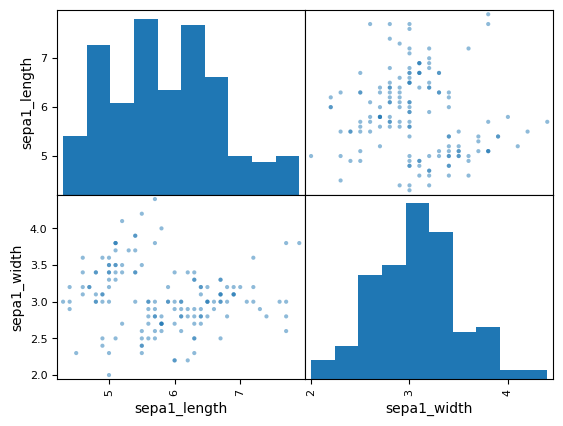

In [34]:
# Scatter Matrix

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
scatter_matrix(data[['sepa1_length', 'sepa1_width']])
plt.show()

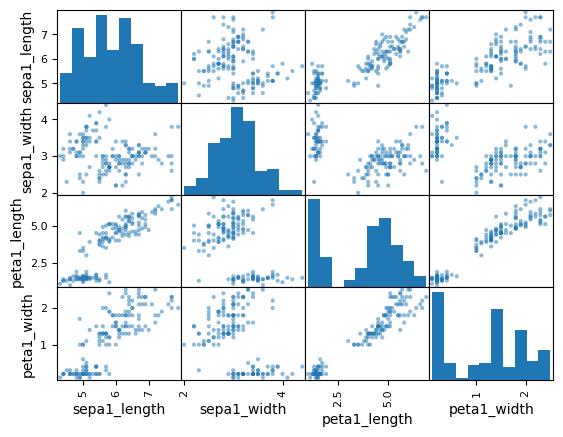

In [35]:
scatter_matrix(data[['sepa1_length', 'sepa1_width', 'peta1_length', 'peta1_width']])
plt.show()

### Hyphothesis Test Statistic Testing: Comparing two groups
#### scipy.stats

This module contains a large number of probability distributions, summary and frequency statistics, correlation functions and statistical tests, masked statistics, kernel density estimation, quasi-Monte Carlo functionality, and more.

```scipy.stats.ttest_1samp()``` tests if the population mean of data is likely to be equal to a given value (technically if observations are drawn from a Gaussian distributions of given population mean). It returns the T statistic, and the p-value (see the function’s help):

Refs: 
- https://docs.scipy.org/doc/scipy/reference/stats.html
- https://scipy-lectures.org/packages/statistics/index.html


In [39]:
## Hyphothesis testing: Comparing two groups
from scipy import stats

In [41]:
# 1-sample t-test: lihat seberapa beda population mean dari suatu hipotesa (sebuah data referensi)
stats.ttest_1samp(data['peta1_length'],0)

Ttest_1sampResult(statistic=26.072598612367706, pvalue=2.1660171997461104e-57)

In [44]:
#stats.ttest_1samp(data['peta1_length'],data['peta1_length'])
stats.ttest_1samp(data['peta1_length'],data['peta1_length'].mean())
# statistic = 0: artinya secara statistik hipotesa (mean = 0) dan dataset identik
# pvalue = 1 artinya data sama dengan hipotesa

Ttest_1sampResult(statistic=-1.5405215162991235e-14, pvalue=0.9999999999999878)

### 2-sample t-test: testing for difference across populations

We have seen above that the mean in the 2 data arrays were different. To test if this is significant, we do a 2-sample t-test with scipy.stats.ttest_ind():

Refs: https://scipy-lectures.org/packages/statistics/index.html

In [46]:
# 2-sample t-test: compare 2 dataset
## Membandingkan data peta1_length pada versicolor dan virginica
df = data
vers = df[df['target'] == 'versicolor']['peta1_length']
virg = df[df['target'] == 'virginica']['peta1_length']
set_ = df[df['target'] == 'setosa']['peta1_length']

stats.ttest_ind(vers,virg)

Ttest_indResult(statistic=-12.603779441384985, pvalue=3.1788195478061495e-22)

In [47]:
stats.ttest_ind(vers, vers)

Ttest_indResult(statistic=0.0, pvalue=1.0)

In [48]:
stats.ttest_ind(vers,set_)

Ttest_indResult(statistic=39.492719391538095, pvalue=5.404910513441677e-62)

In [49]:
## Paired tests: Repeating measurement on the same individual/object with different condition/treatime
### 1. different time (pre-test dan post-test)
### 2. under two different condition (referensi/control dan hasil eksperimen/experimental condition , pre-treatment dan post-treatment)
### 3. dst

## Commonly use
### 1. Statisitical difference between two time points
### 2. Statisitical difference between two conditions
### 3. Statisitical difference between two measurements
### dst
vers1 = vers
import numpy as np
vers2 = np.array(list(vers))+2 #Explore lebih jauh
#vers2 = np.array(list(vers))*2
vers3 = np.array(list(vers))+0.01

In [50]:
stats.ttest_rel(vers1, vers2)

Ttest_relResult(statistic=-1.1145840426920102e+17, pvalue=0.0)

In [51]:
stats.ttest_rel(vers1, vers3)

Ttest_relResult(statistic=-inf, pvalue=0.0)

In [52]:
## Linear Model
x = np.linspace(-5, 5, 20)
np.random.seed(1)
y = -5 + 3*x + 4*np.random.normal(size=x.shape)
y

array([-13.50261855, -20.86807829, -18.95479227, -19.55503238,
       -10.22258001, -21.31141795,  -3.54706873, -11.99219602,
        -6.09226467,  -6.78695519,   1.63790543, -10.87214179,
        -2.3423004 ,  -1.00990163,   6.64034093,  -0.71535454,
         4.57344506,   3.33067159,   8.58990762,  12.33126085])

In [54]:
data = pd.DataFrame({'x':x, 'y':y})
data

,x,y
0,-5.000000,-13.502619
1,-4.473684,-20.868078
2,-3.947368,-18.954792
3,-3.421053,-19.555032
4,-2.894737,-10.222580
5,-2.368421,-21.311418
6,-1.842105,-3.547069
7,-1.315789,-11.992196
8,-0.789474,-6.092265
9,-0.263158,-6.786955


### Python statsmodels.formula.api.ols()

Since version 0.5.0, statsmodels allows users to fit statistical models using R-style formulas. Internally, statsmodels uses the patsy package to convert formulas and data to the matrices that are used in model fitting. The formula framework is quite powerful; this tutorial only scratches the surface. A full description of the formula language can be found in the patsy docs:

Refs:
- https://www.statsmodels.org/dev/example_formulas.html
- https://www.statsmodels.org/dev/example_formulas.html

In [56]:
from statsmodels.formula.api import ols
model = ols('y ~ x', data).fit()

In [57]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     74.03
Date:                Thu, 16 Sep 2021   Prob (F-statistic):           8.56e-08
Time:                        22:54:17   Log-Likelihood:                -57.988
No. Observations:                  20   AIC:                             120.0
Df Residuals:                      18   BIC:                             122.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.5335      1.036     -5.342      0.000      -7.710      -3.357
x              2.9369      0.341      8.604      0.000       2.220       3.654
==============================================================================
Omnibus:                        0.100   Durbin-Watson:                   2.956
Prob(Omnibus):                  0.951   Jarque-Bera (JB):                0.322
Skew:                          -0.058   Prob(JB):                        0.851
Kurtosis:                       2.390   Cond. No.                         3.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
data

,x,y
0,-5.000000,-13.502619
1,-4.473684,-20.868078
2,-3.947368,-18.954792
3,-3.421053,-19.555032
4,-2.894737,-10.222580
5,-2.368421,-21.311418
6,-1.842105,-3.547069
7,-1.315789,-11.992196
8,-0.789474,-6.092265
9,-0.263158,-6.786955


target_name:  {'setosa', 'versicolor', 'virginica'}


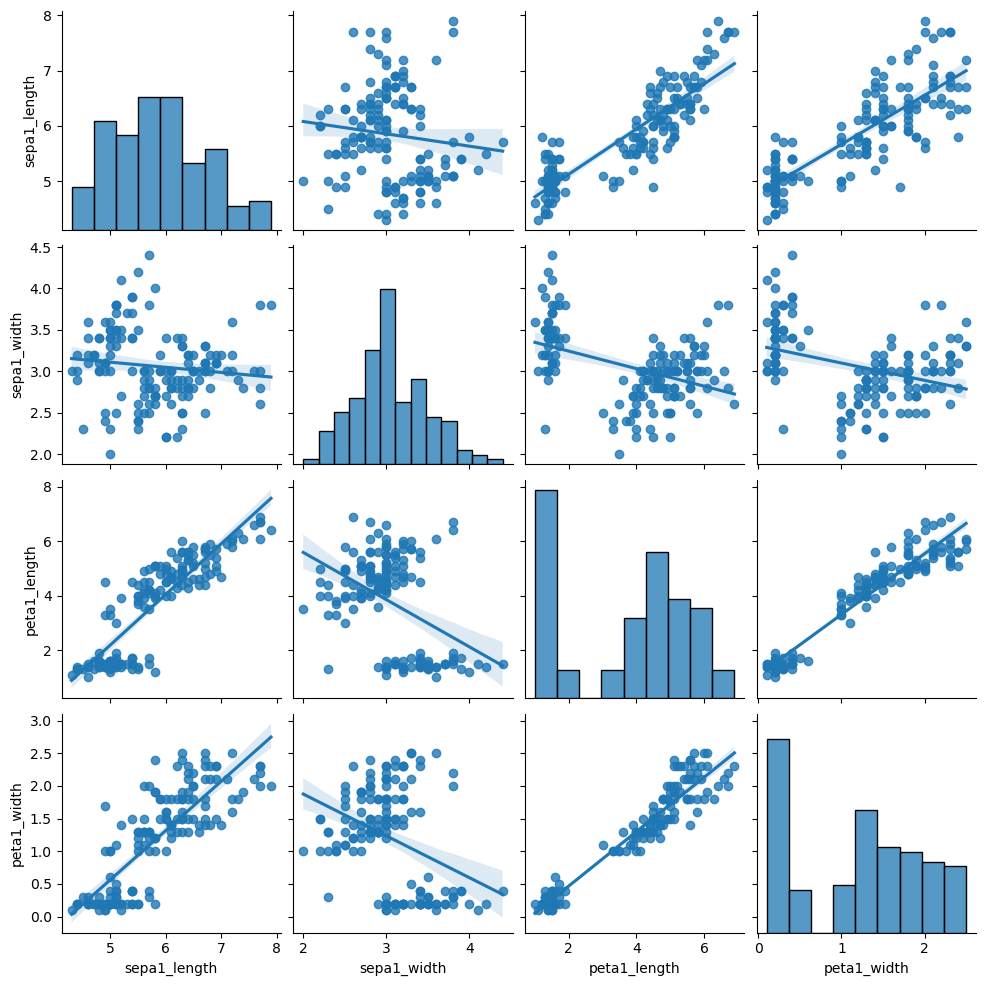

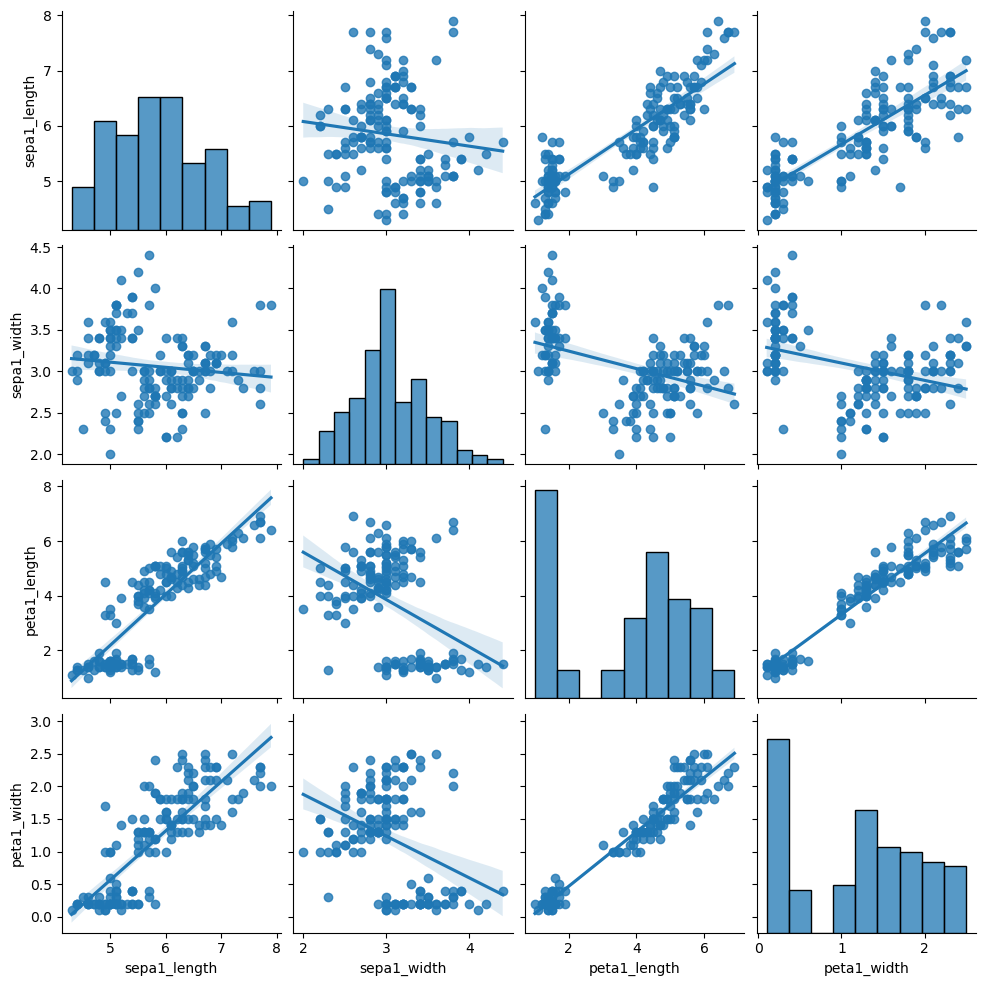

In [64]:
import seaborn

data = get_df_with_string()

seaborn.pairplot(data,
                vars=['sepa1_length', 'sepa1_width', 'peta1_length', 'peta1_width'],
                kind='reg')

plt.show()

In [65]:
## Measure of centrar tendency
### 1.mean
### 2.mode = data terbanyak
### 3.median = nilai tengah

setosa = df[df['target']=='setosa']
versicolor = df[df['target']=='versicolor']
virginica = df[df['target']=='virginica']

In [66]:
data

,sepa1_length,sepa1_width,peta1_length,peta1_width,target,target_int
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


In [67]:
## Measure of spread
### 1. Range: perbedaan antara min dan max
range_ = np.max(setosa['peta1_length']) - np.min(setosa['peta1_length'])
range_

0.8999999999999999

In [68]:
# 2. Percentil: data yang berada tepat dibawah suatu nilai persen
list_ = list(range(0, 100))
print(list_)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [70]:
list_ = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 
         46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 
         57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 
         68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78,
         13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 
         24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 
         35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 
         79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 
         90, 91, 92, 93, 94, 95, 96, 97, 98, 99]

In [71]:
np.percentile(list_,25)

24.75

In [72]:
# 3. Quartil
## 1.diurutkan
## 2.dipotong jadi 4 bagian
## 3.nilai kuartil ada pada potongan tsb
## Q1:25, Q2:50, Q3:75, Q4:100

print(np.percentile(setosa['peta1_length'],25))
print(np.percentile(setosa['peta1_length'],50))
print(np.percentile(setosa['peta1_length'],75))
print(np.percentile(setosa['peta1_length'],100))

1.4
1.5
1.5750000000000002
1.9


In [73]:
# 4. Interquartil range (IQR)
## IQR = Q3-Q1
print(np.percentile(setosa['peta1_length'],75) - np.percentile(setosa['peta1_length'],25))

## Outlayer: data diluar range rata2, atau tidak umum

0.17500000000000027


In [74]:
#### 5. Mean absolute deviation
## 1. hitung rerarta
## 2. absolut(member-mean)
## 3. dijumlahkan
## 4. dibagi total data

data = [1,2,5,6,4,3,5]
mean = np.mean(data)
mad = 0
for d in data:
    mad = mad + abs(d - mean)

mad = mad/len(data)
mad

1.4693877551020407

In [75]:
## Variance: measure how far is data point from the mean variance
print(np.var(setosa['peta1_length']))

## standard deviation
print(np.std(setosa['peta1_length']))


0.02955600000000001
0.17191858538273286


In [76]:
# Probability density function (PDF)
data = get_df_with_string()
data


target_name:  {'setosa', 'versicolor', 'virginica'}


,sepa1_length,sepa1_width,peta1_length,peta1_width,target,target_int
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


/home/tb/anaconda3/envs/Ngoding1/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/tb/anaconda3/envs/Ngoding1/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/tb/anaconda3/envs/Ngoding1/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functio

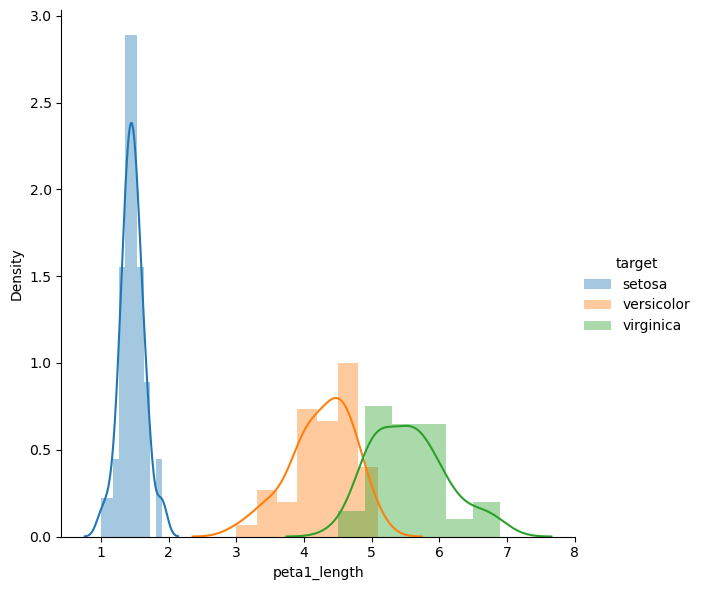

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.FacetGrid(
    data, hue='target', height=6).map(
    sns.distplot, 'peta1_length').add_legend()
plt.show()

/home/tb/anaconda3/envs/Ngoding1/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


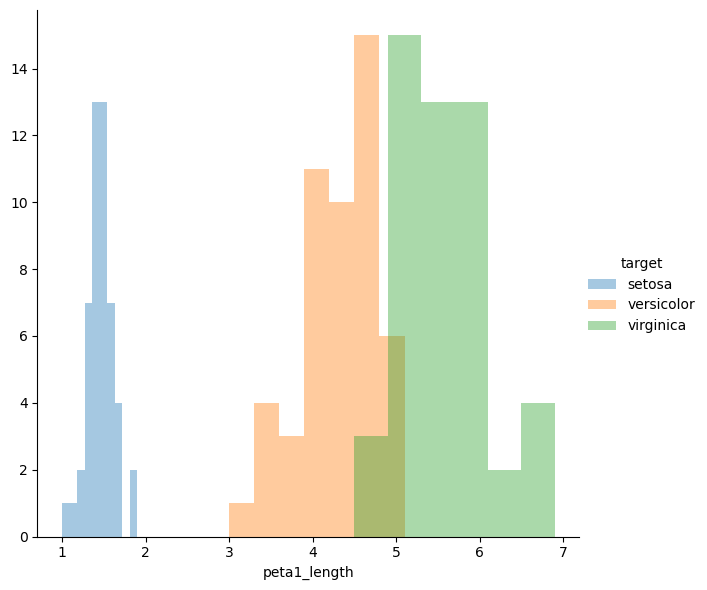

In [84]:
sns.FacetGrid(data, hue='target', height=6).map(sns.distplot, 'peta1_length', kde=False).add_legend()
plt.show()

/home/tb/anaconda3/envs/Ngoding1/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


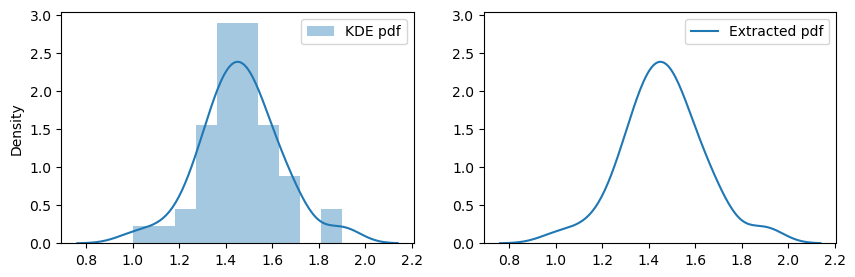

In [96]:
def get_dft(setosa, col):
    list_ = list(setosa[col])
    fig, axs = plt.subplots(1, 2, figsize=(10, 3))
    x = np.array(list_)
    ax1 = sns.distplot(x, ax=axs[0], label='KDE pdf') # Plot Histogram of Data Distribution

    fit  = ax1.get_lines()[0].get_data() # Mengekstrak data kurva PDF dari histogram ax1
    xfit, yfit = fit[0], fit[1]
    
    ax1.legend()
    axs[1].plot(xfit, yfit, label='Extracted pdf') #Plot PDF pada axs[1]--> kolom 2 baris 1
    axs[1].set_ylim(ax1.get_ylim())
    plt.legend()
    return xfit, yfit

xfit, yfit = get_dft(setosa, 'peta1_length')

plt.show()

In [97]:
sum(yfit)

144.55895151455366

In [98]:
# Pearson correlation
## kalau korelasinya +1 maka terkorelasi linear positif
## kalau korelasinya -1 maka terkorelasi linear negatif
## kalau 0, tidak tidak terkorelasi linear

df.corr()

,sepa1_length,sepa1_width,peta1_length,peta1_width,target_int
sepa1_length,1.000000,-0.117570,0.871754,0.817941,0.782561
sepa1_width,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
peta1_length,0.871754,-0.428440,1.000000,0.962865,0.949035
peta1_width,0.817941,-0.366126,0.962865,1.000000,0.956547
target_int,0.782561,-0.426658,0.949035,0.956547,1.000000


In [99]:
def plot(data, x, y):
    plt.scatter(data[x], data[y])
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()
    return None

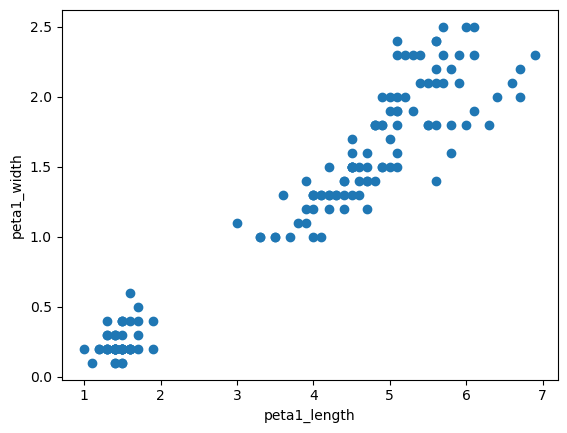

In [102]:
plot(df, 'peta1_length','peta1_width')

In [104]:
## Compare two datasets
### 1.prove changes?
### 2.understand their differences

import datacompy 
df1 = versicolor.reset_index()
df2 = virginica.reset_index()

In [105]:
compare = datacompy.Compare(df1, df2, join_columns='index')
print(compare.report())

DataComPy Comparison
--------------------

DataFrame Summary
-----------------

  DataFrame  Columns  Rows
0       df1        7    50
1       df2        7    50

Column Summary
--------------

Number of columns in common: 7
Number of columns in df1 but not in df2: 0
Number of columns in df2 but not in df1: 0

Row Summary
-----------

Matched on: index
Any duplicates on match values: No
Absolute Tolerance: 0
Relative Tolerance: 0
Number of rows in common: 0
Number of rows in df1 but not in df2: 50
Number of rows in df2 but not in df1: 50

Number of rows with some compared columns unequal: 0
Number of rows with all compared columns equal: 0

Column Comparison
-----------------

Number of columns compared with some values unequal: 0
Number of columns compared with all values equal: 7
Total number of values which compare unequal: 0

Sample Rows Only in df1 (First 10 Columns)
------------------------------------------

    index  sepa1_length  sepa1_width  peta1_length  peta1_width      tar

In [106]:
compare.df2_unq_rows

,index,sepa1_length,sepa1_width,peta1_length,peta1_width,target,target_int
50,100,6.3,3.3,6.0,2.5,virginica,2.0
51,101,5.8,2.7,5.1,1.9,virginica,2.0
52,102,7.1,3.0,5.9,2.1,virginica,2.0
53,103,6.3,2.9,5.6,1.8,virginica,2.0
54,104,6.5,3.0,5.8,2.2,virginica,2.0
55,105,7.6,3.0,6.6,2.1,virginica,2.0
56,106,4.9,2.5,4.5,1.7,virginica,2.0
57,107,7.3,2.9,6.3,1.8,virginica,2.0
58,108,6.7,2.5,5.8,1.8,virginica,2.0
59,109,7.2,3.6,6.1,2.5,virginica,2.0


In [107]:
compare.intersect_rows

,index,sepa1_length_df1,sepa1_width_df1,peta1_length_df1,peta1_width_df1,target_df1,target_int_df1,sepa1_length_df2,sepa1_width_df2,peta1_length_df2,peta1_width_df2,target_df2,target_int_df2,_merge,target_int_match,sepa1_length_match,target_match,sepa1_width_match,peta1_length_match,peta1_width_match


# Eksplore:
1.Matplotlib  
2.Seaborn  
3.Compare 2 data  
4.Chi Square

pvalue: 
- https://en.wikipedia.org/wiki/P-value
- https://www.investopedia.com/terms/p/p-value.asp

## Seaborn
Refs: 
- https://seaborn.pydata.org/tutorial.html
- https://www.datacamp.com/community/tutorials/seaborn-python-tutorial?utm_source=adwords_ppc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=278443377095&utm_targetid=aud-299261629574:dsa-473406580275&utm_loc_interest_ms=&utm_loc_physical_ms=1007716&gclid=Cj0KCQjw1ouKBhC5ARIsAHXNMI-xOdOFfTrShB6_IHzBdloyoP-I9m8bB027AJwFuONnsW0xFsricJQaAkl0EALw_wcB

Vizualizing: statistical relationships, distributions of data, categorical data, regression models, etc.

## 4.Chi Square

Ref 1: https://www.southampton.ac.uk/passs/full_time_education/bivariate_analysis/chi_square.page

Is there a statiticallly significant relationship between a student's Year 11 truancy (pembolosan) and his/her enrolment in full time education after secondary school?

A chi-square test is a statistical test used to compare observed results (**observed variable**) with expected results (**expected variable**). The purpose of this test is to determine **if a difference between observed data and expected data is: due to chance, or if it is due to a relationship between the variables being studied.** Therefore, a chi-square test is an excellent choice to help us better understand and interpret the relationship between our two categorical variables.

Ref 2: https://en.wikipedia.org/wiki/Chi-squared_test

A chi-squared test is a statistical hypothesis test, that is valid to perform when the test statistic is chi-squared distributed under null hypothesis. Pearson's chi-squared test is used to determine, wether there is a statistically significant difference between the expected frequencies and the observed frequencies in one or more categories of a contingency table.  

$$
X^2 = \sum_i \frac{(variable_i^{ob} - variable_i^{ex})}{variable_i^{ex}}
$$

If $X^2$ lower than the critical value of the Chi-Squared distribution, then the observed variable is considered statistically equal to the expected variable.  

Example:
- https://www.youtube.com/watch?v=HKDqlYSLt68 
- https://www.youtube.com/watch?v=WXPBoFDqNVk

### Null Hypothesis
Refs: 
- https://en.wikipedia.org/wiki/Null_hypothesis
- https://id.lifehackk.com/27-definition-of-null-hypothesis-and-examples-605436-8689

Uma Sekaran: Hypothesis adalah hubungan yang diduga secara logis antara dua variable atau lebih dalam rumusan proposisi yang dapat diuji secara empiris.  
Kerliger: hipotesis adalah dugaan, proposisi sementara mengenai hubungan/kaitan antara dua **variabel** atau lebih fenomena atau variabel.  
Sugiyono: hipotesis merupakan jawaban sementara terhadap rumusan masalah penelitian, dimana rumusan masalah penelitian telah dinyatakan dalam bentuk pertanyaan.>> Dikatakan sementara karena jawaban yang diberikan baru didasarkan pada teori.  
Emory: hipotesis sebagai suatu rumusan pertanyaan yang bersifat sementara dan akan diuji secara empiris.  
Fraenkel dan Wallen: Hipotesis meruapakan prediksi mengenai kemungkinan hasil dari suatu penelitian.  
James(1999:109): hipotesis adalah suatu pernyataan sementara mengenai sesuatu, yang keadaannya biasanya tidak diketahui.  

Hipotesis:
- Jawaban sementara dari rumusan masalah
- didasarkan pada teori yang relevan
- yang kemudian harus dibuktikan melalui penelitian empiris.

Jenis perumusan hipotesis: ada pengaruh, ada perbedaan, ada hubungan. Contoh:  
- $H_o$: **Tidak ada** hubungan antara motivasi kerja dengan kepuasan kerja karyawan pada PT ABCD.  
- $H_a$: **Ada** hubungan natara motivasi kerja dengan kepuasan kerja karyawan pada PT ABCD.  

- $H_o$: **Tidak ada** pengaruh secara parsial kepuasan konsumen, harga dan lokasi supermarket terhadap loyalitas konsumen pada supermarket X di Yogyakarta  
- $H_a$: **Ada** pengaruh secara parsial kepuasan konsumen, harga dan lokasi supermarket terhadap loyalitas konsumen pada supermarket X di Yogyakarta  

Apa bedanya $H_a$ dan $H_o$?  
Ditinjau dari perumusannya, $H_a$ dan $H_o$:
- **$H_a$** merupakan Hipotesis kerja yang bisa juga disebut: **Hipotesis Awal**, hipotesis alternatif, hipotesis asli. 
- Hipotesis kerja yaitu hiptesis sintesis dari hasil kajian teoritis.    
- Penulisan Hipotesis kerja biasanya disingkat $H_a$, atau dapat disingkat $H_1$, $H_2$ dst, atau $H_{a1}$, $H_{a2}$ dst.
- **$H_o$** atau hipotesis nol atau hipotesis statistik, merupakan lawan dari hipotesis kerja, atau pengingkaran dari $H_a$.  
- Ciri dari $H_o$ biasanya terdapat kata **tidak**. 

Jadi: **Null hypothesis ($H_o$)** adalah hiptesis statistik, merupakan pengingkaran/lawan dari hipotesis awal ($H_a$).

#### Jenis Hipotesis
1. Hipotesis Deskriptif
    - merupakan jawaban sementara terhadap masalah deskriptif, yaitu yg berkenaan dengan variabel mandiri/ single variable.
    - bisa terdapat beberapa kategori. 
    - Contoh: 
        - $H_o$: pelanggan rental PS tidak bertahan 3 jam saat memainkan game.
        - $H_a$: pelanggan rental PS bertahan 3 jam saat memainkan game.
        - Jadi, jika pelanggan bertahan kurang dari 3 jam atau lebih dari 3 jam, $H_a$ ditolak/gagal. 
2. Hipotesis Komparatif
    - merupakan jawaban sementara terhadap rumusan masalah pembandingan/komparatif/membedakan.
    - Pada rumusan ini variabelnya sama tetapi populasinya atau sampelnya yang berbeda, atau keadaan itu terjadi pada waktu yang berbeda.
    - Contoh:  
        - $H_o$: tidak terdapat perbedaan antara kinerja karyawan bagian produksi lini A dan lini B.
        - $H_a$: terdapat perbedaan antara kinerja karyawan bagian produksi lini A dan lini B.
3. Hipotesis Asosiatif
    - merupakan jawaban sementara terhadap rumusan masalah asosiatif, yaitu menyatakan hubungan atau pengaruh antara dua variabel atau lebih.
    - Contoh:
        - $H_o$: tidak ada pengaruh secara parsial kepuasan konsumen, harga dan lokasi supermarket terhadap loyalitas konsumen pada supermarket X.
        - $H_a$: ada pengaruh secara parsial kepuasan konsumen, harga dan lokasi supermarket terhadap loyalitas konsumen pada supermarket X.  
        
        
Apakah hipotesis harus ada? 
- Jika ada rumusan masalah atau judul yang bersifat deskriptif, maka hipotesis boleh tidak ada.
- Jika penelitian kamu memuat tentang hubungan antar variabel, maka hipotesis harus ada.


Bagaimana cara membuat hipotesis?
- melalui toeri/referensi pendukung yang relevan, dan berhubungan dengan variabel yang diteliti.